#### Name  - Raj Kulhade
#### Qualification - Full Stack Python & DataScience [NareshIT], DataScience Bootcamp
#### SKills - Python , SQL , **Machine Learning**

# Predictive Analysis and Coustmer Segmentation for an E-Commerce platform

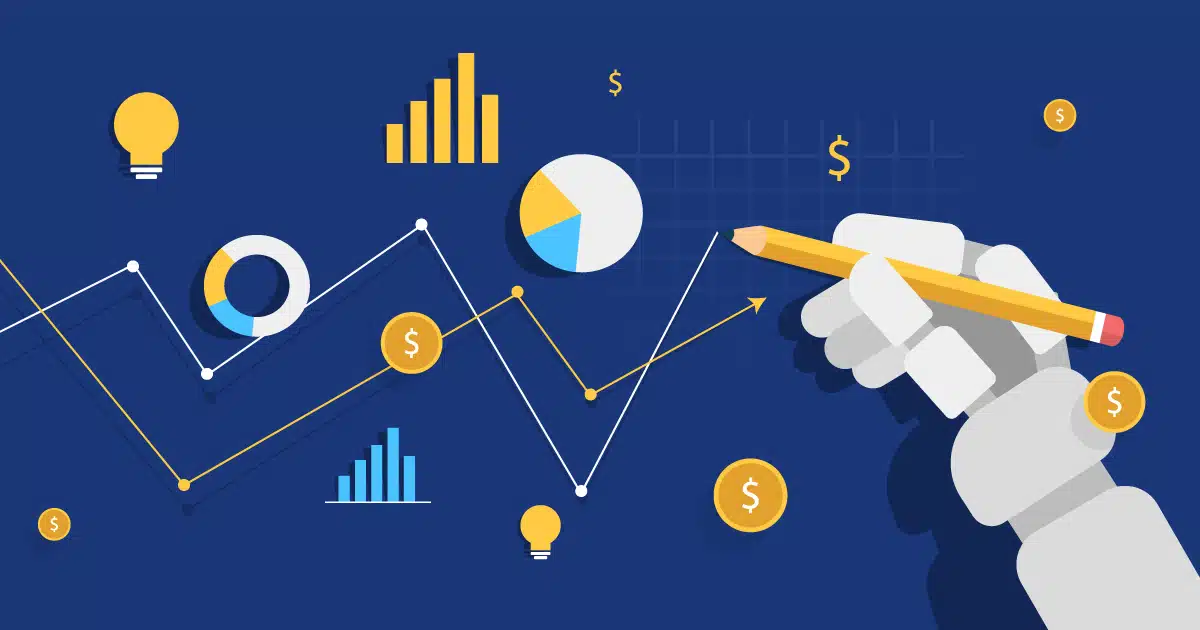

## About Dataset

In the field of e-commerce, the datasets are typically considered as proprietary, meaning they are owned and controlled by individual organizations and are not often made publicly available due to privacy and business considerations. In spite of this, The UCI Machine Learning Repository, known for its extensive collection of datasets beneficial for machine learning and data mining research, has curated and made accessible a unique dataset. This dataset comprises actual transactional data spanning from the year 2010 to 2011. For those interested, the dataset is maintained and readily available on the UCI Machine Learning Repository's site under the title "Online Retail".

Content

The dataset is a transnational one, capturing every transaction made from December 1, 2010, through December 9, 2011, by a UK-based non-store online retail company. As an online retail entity, the company doesn't have a physical store presence, and its operations and sales are conducted purely online. The company's primary product offering includes unique gifts for all occasions. While the company serves a diverse range of customers, a significant number of its clientele includes wholesalers.

Acknowledgements

In collaboration with the UCI Machine Learning Repository, the dataset was provided and made available by Dr. Daqing Chen. Dr. Chen is the Director of the Public Analytics group at London South Bank University, UK. Any correspondence regarding this dataset can be sent to Dr. Chen at 'chend' at 'lsbu.ac.uk'. We are grateful to him for providing such an invaluable resource for researchers and data science enthusiasts.

The image used has been sourced from Canva

Inspiration

The rich and extensive data within this dataset opens the door for a multitude of potential analyses. It lends itself well to various methods and techniques in data science, including but not limited to time series analysis, clustering, and classification. By exploring this dataset, one could derive key insights into customer behavior, transaction trends, and product performance, providing ample opportunities for deep and insightful explorations.

# Importing the Necessary Packages

In [1]:
# For Data Analysis and Mathamatical Function using the below Lib:-
import numpy as np 
import pandas as pd


#Data Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.patches as mpatches
import missingno as mn

#Remving the Warning 
import warnings
warnings.filterwarnings('ignore')

#for spliting the data using the below lib
from sklearn.model_selection import cross_val_score,train_test_split

#for Data Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#for Normalizing and standardization of the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# For imputation 
from sklearn.impute import KNNImputer

# Machine LEarning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Bussiness Understanding and Data Collection

In [2]:
Online_df = pd.read_csv(r"C:\Users\EXPERT\Desktop\Ineubytes Internship\online-retail-ecommerce-dataset\data.csv",encoding="Unicode_escape")
df=Online_df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.shape

(541909, 8)

#### Insights:
* Through the utilization of the Pandas head() and tail() functions, no unusual patterns or behaviors are observed within the dataset. This includes the absence of NaN values or any instances of missing data.

# Data Cleaning and Preprocessing

### Droping The Nulll Value's:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
(df.isnull().sum()/541909) *100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### Insigth's:
* We can Encounter that we are having the Null Values we are dropping all the null Values

In [7]:
df = df.dropna()

In [8]:
(df.isnull().sum()/541909) *100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

#### Insight's:
* All the Null Values have been Removed But Still we have to Explore more of the things.

### Checking the Quantity Field:

In [9]:
df.query('Quantity<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


#### Insight's:
* Quantites cannot be less than 0.

### Checking the UnitPrice Field:

In [10]:
df.query('UnitPrice<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Insight's:
* here we can view this that our unit price is less than 0 and our dataset is too big so we will remove the two rows

#### Dropping the rows where quantity < 0 and Unitprice <0

In [11]:
notuse_index=df[(df['Quantity']<0)| (df['UnitPrice']<0)].index
df=df.drop(notuse_index)
df=df.reset_index(drop=True)

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Insights:
* Essentially we have dropped the approx 10000 rows from the dataset as for the data cleaning pupose and that was of No-use because we want the Pure dataset with us to give us the best prediction

### Converting the Invooice Dat to Month , Day , Year Format

In [13]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['CustomerID']=df['CustomerID'].astype('int64')

#### Multiplying Quantity with Unit Rate for Total Amount

In [16]:
df['Total_Amount']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [17]:
df.insert(loc=3,column="year",value=df.InvoiceDate.dt.year)

Insights:
    
* Temporal Analysis: The "year" column enables temporal analysis and helps identify annual trends and seasonal patterns in customer behavior.

* Feature Engineering: It provides opportunities for feature engineering, allowing the creation of additional time-related features.

* Visualizations: Simplifies the creation of visualizations to visualize how data evolves over time.

* Business Strategy: Insights from annual data analysis can inform business strategies, marketing, and promotions.

* Data-Driven Decisions: Supports data-driven decision-making by providing historical context.

In [18]:
df.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## EDA

In [19]:
cc=df.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
cc.head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


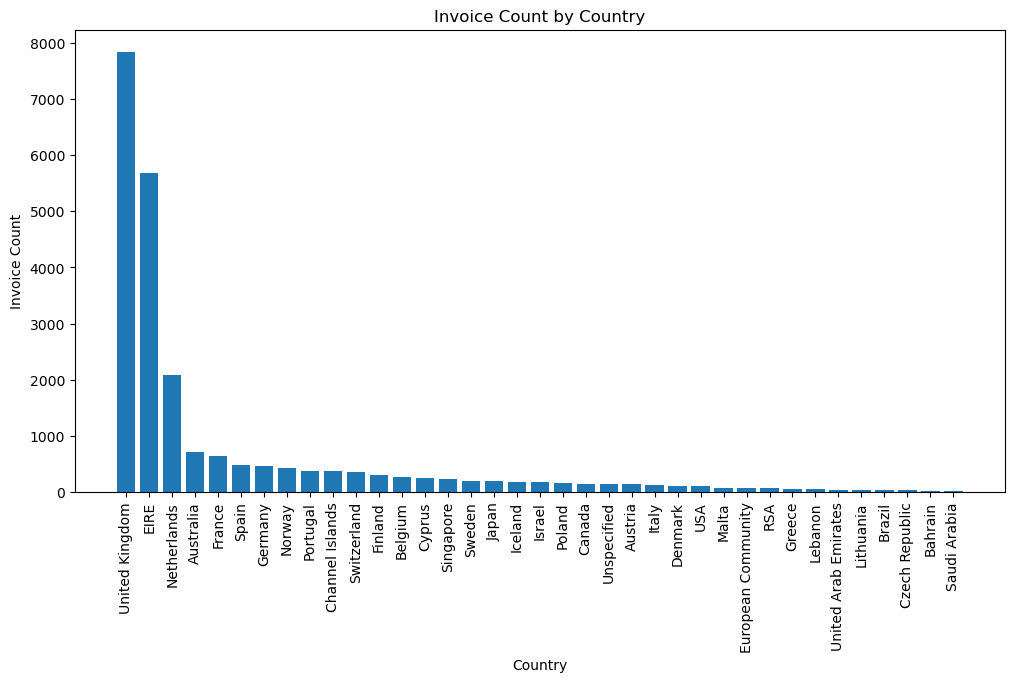

In [20]:
cc_sorted = cc.sort_values(by='InvoiceNo', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(cc_sorted['Country'], cc_sorted['InvoiceNo'])
plt.xlabel('Country')
plt.ylabel('Invoice Count')
plt.title('Invoice Count by Country')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [21]:
purchase=df.groupby(by=['CustomerID','Country'],as_index=False)['Total_Amount'].sum()
purchase

,CustomerID,Country,Total_Amount
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


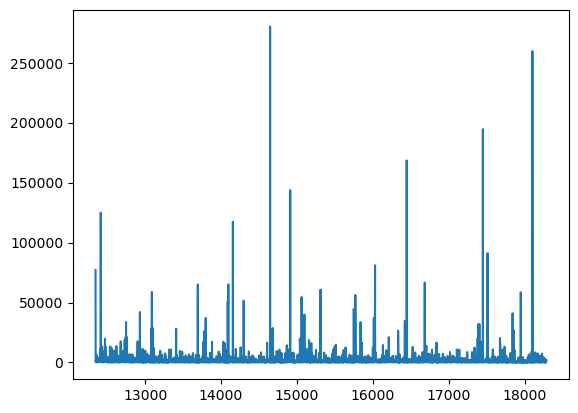

In [22]:
plt.plot(purchase['CustomerID'],purchase['Total_Amount'])
plt.xlabel=('CustomerID')
plt.ylabel=('Total_Amount')


In [23]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,Quantity,UnitPrice,CustomerID,Total_Amount
year,1.000000,0.001595,-0.000191,-0.036352,0.000431
Quantity,0.001595,1.000000,-0.004561,-0.006411,0.908812
UnitPrice,-0.000191,-0.004561,1.000000,-0.010863,0.081646
CustomerID,-0.036352,-0.006411,-0.010863,1.000000,-0.004104
Total_Amount,0.000431,0.908812,0.081646,-0.004104,1.000000


In [24]:
amountpercountry=df.groupby(by=['Country'],as_index=False)['Total_Amount'].sum()
amountpercountry.head()

,Country,Total_Amount
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,548.40
3,Belgium,41196.34
4,Brazil,1143.60


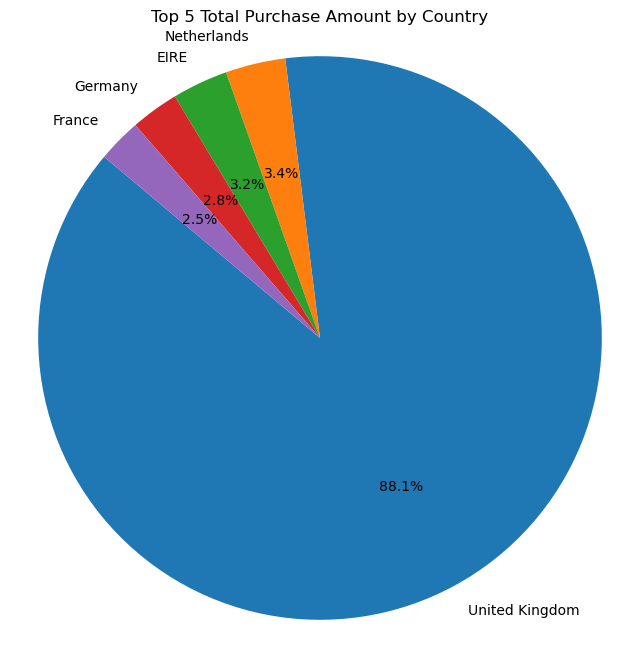

In [25]:
# Sort the DataFrame by 'Total_Amount' in descending order and select the top 5 countries
top_countries = amountpercountry.sort_values(by='Total_Amount', ascending=False).head(5)

# Extract data for the pie chart
country_names = top_countries['Country']
total_amounts = top_countries['Total_Amount']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_amounts, labels=country_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Total Purchase Amount by Country')
plt.show()

TypeError: 'str' object is not callable

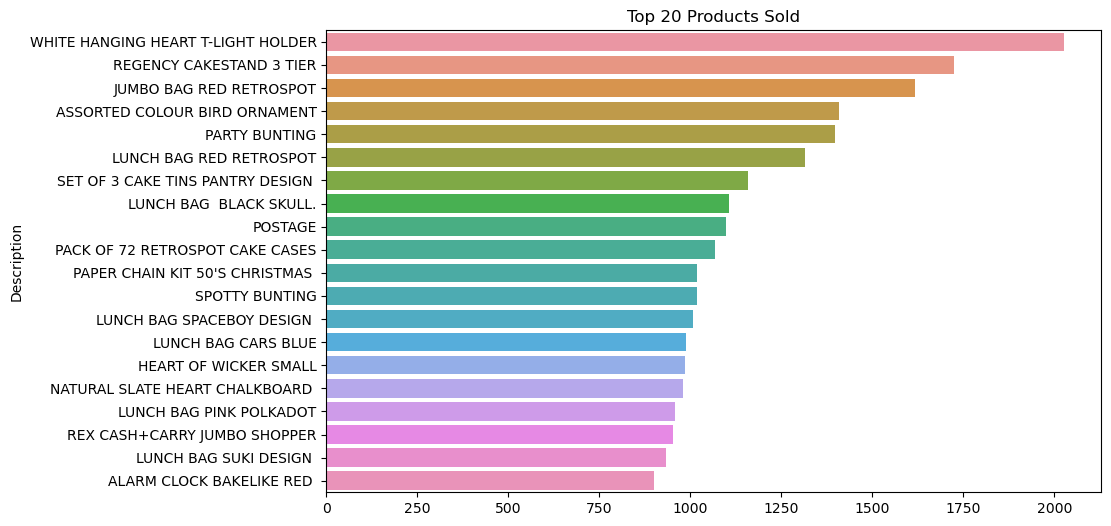

In [26]:
# Get the top 20 products sold
top_products = df['Description'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, orient='h')
plt.title("Top 20 Products Sold")
plt.xlabel("Quantity")
plt.ylabel("Product Description")
plt.show()

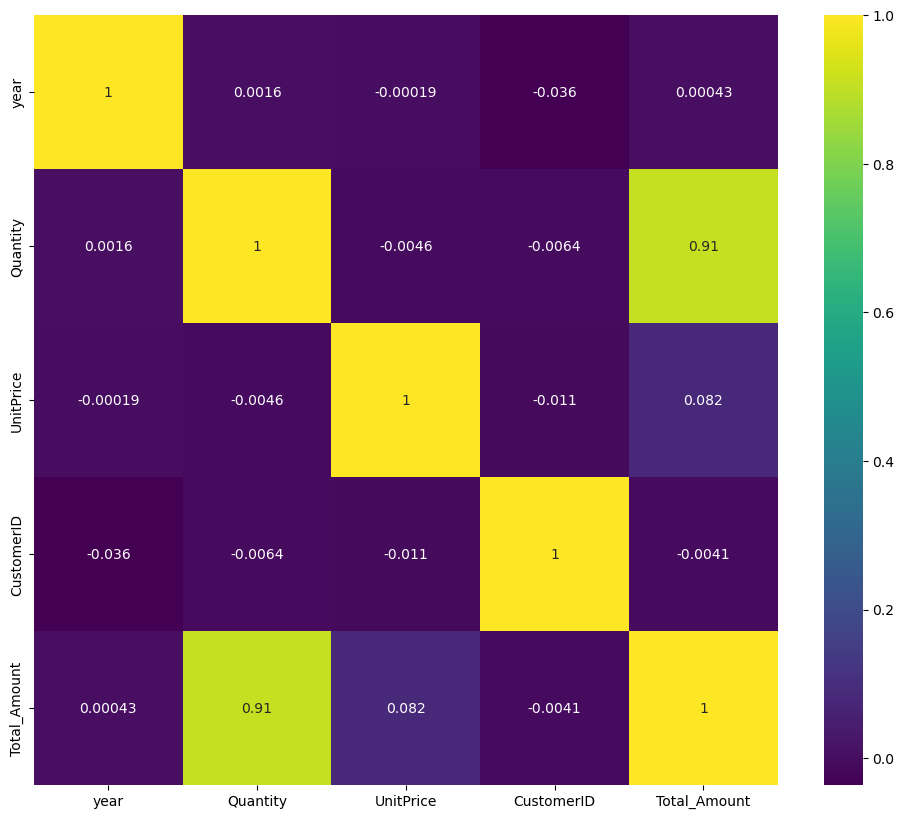

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.show()

# Stage 4: Feature Engineering and Data Transformation

In [28]:
df['Month']  = df['InvoiceDate'].dt.month
df['Day']    = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [29]:
df.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8


In [30]:
df['Log_Annual_Spending']=np.log1p(df['Total_Amount'])

In [31]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour,Log_Annual_Spending
count,397924,397924,397924,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
unique,18536,3665,3877,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN
freq,542,2035,2028,NaN,NaN,NaN,NaN,NaN,354345,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2010.934259,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,NaN,22.394749,7.612537,15.042181,12.728247,2.454360
min,NaN,NaN,NaN,2010.000000,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,0.000000,1.000000,1.000000,6.000000,0.000000
25%,NaN,NaN,NaN,2011.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,NaN,4.680000,5.000000,7.000000,11.000000,1.736951
50%,NaN,NaN,NaN,2011.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,NaN,11.800000,8.000000,15.000000,13.000000,2.549445
75%,NaN,NaN,NaN,2011.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,NaN,19.800000,11.000000,22.000000,14.000000,3.034953
max,NaN,NaN,NaN,2011.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN,168469.600000,12.000000,31.000000,20.000000,12.034517


(array([4.86080e+04, 1.30598e+05, 1.80728e+05, 2.90540e+04, 7.70800e+03,
        1.03100e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.20345165,  2.40690331,  3.61035496,  4.81380661,
         6.01725827,  7.22070992,  8.42416157,  9.62761323, 10.83106488,
        12.03451653]),
 <BarContainer object of 10 artists>)

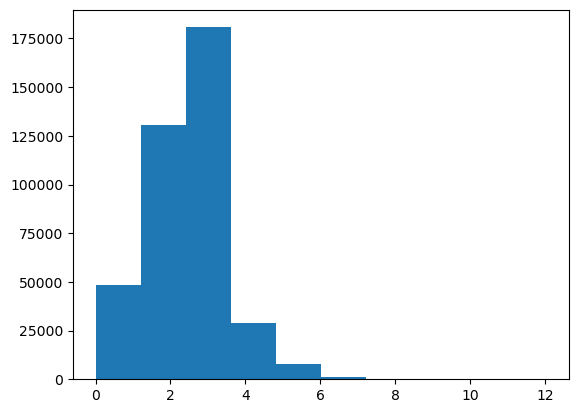

In [32]:
plt.hist(df['Log_Annual_Spending'])

(array([3.97921e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.  ,  16846.96,  33693.92,  50540.88,  67387.84,  84234.8 ,
        101081.76, 117928.72, 134775.68, 151622.64, 168469.6 ]),
 <BarContainer object of 10 artists>)

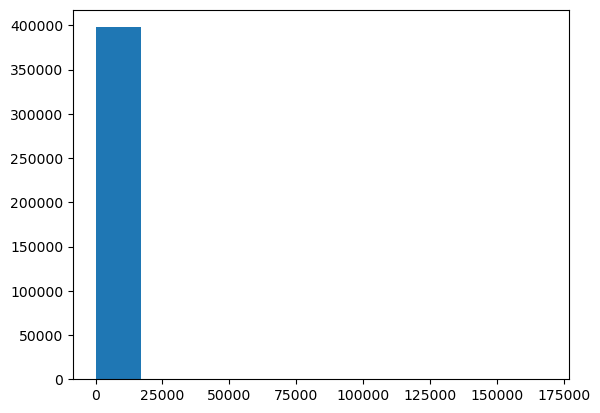

In [33]:
plt.hist(df['Total_Amount'])

In [34]:
LE=LabelEncoder()
df['Country_Encoded']=LE.fit_transform(df['Country'])

In [35]:
df.head()

,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour,Log_Annual_Spending,Country_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2.791165,35
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,3.135494,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35


# Stage 5: Predictive Model Building

In [36]:
x = df[['Quantity', 'UnitPrice', 'Country_Encoded', 'year']]
y = df['Total_Amount']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Linear Regression

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predicted_train_linear_R=lr.predict(x_train)
y_predicted_test_linear_R=lr.predict(x_test)

In [39]:
decision_tree=DecisionTreeRegressor(random_state=10)
decision_tree.fit(x_train,y_train)
y_predicted_train_decision_tree=decision_tree.predict(x_train)
y_predicted_test_decision_tree=decision_tree.predict(x_test)

In [40]:
RFR=RandomForestRegressor(random_state=40)
RFR.fit(x_train,y_train)
y_predicted_train_RFR=RFR.predict(x_train)
y_predicted_test_RFR=RFR.predict(x_test)

# Stage 6: Model Evaluation and Customer Segmentation

### Linear Regression Performance On Training And Testing

In [41]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_linear_R)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_linear_R))


print("                                                   ")
print("*"*50)
print("                                                   ")

print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_linear_R))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_linear_R))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_linear_R)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_linear_R))

              Training Dataset           
Mean absolute error:      12.40358816008474
Mean squared  error:      19057.256869532444
Root Mean squared error:  138.04802377988773
R2 score:                0.8388062597477601
                                                   
**************************************************
                                                   
              Testing Dataset           
Mean absolute error:      11.89723966825941
Mean squared  error:      3393.92029062787
Root Mean squared error:  58.25736254438464
R2 score:                0.27343377352287446


## Decision Tree Performance On Training And Testing

In [42]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_decision_tree)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_decision_tree))

print("                                                   ")
print("*"*50)
print("                                                   ")

print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_decision_tree))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_decision_tree))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_decision_tree)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_decision_tree))

              Training Dataset           
Mean absolute error:      2.3668880479989104e-13
Mean squared  error:      2.8019461381939727e-25
Root Mean squared error:  5.293341230446015e-13
R2 score:                1.0
                                                   
**************************************************
                                                   
              Testing Dataset           
Mean absolute error:      0.1832496073383037
Mean squared  error:      105.1764719783879
Root Mean squared error:  10.25555810175087
R2 score:                0.9774839519447355


## Random Forest Regressor Performance On Training And Testing¶

In [43]:
print("              Training Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_train,y_predicted_train_RFR))
print("Mean squared  error:     ",mean_squared_error(y_train,y_predicted_train_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_train,y_predicted_train_RFR)))
print("R2 score:               ",r2_score(y_train,y_predicted_train_RFR))

print("                                                   ")
print("*"*50)
print("                                                   ")

print("              Testing Dataset           ")
print("Mean absolute error:     ",mean_absolute_error(y_test,y_predicted_test_RFR))
print("Mean squared  error:     ",mean_squared_error(y_test,y_predicted_test_RFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predicted_test_RFR)))
print("R2 score:               ",r2_score(y_test,y_predicted_test_RFR))

              Training Dataset           
Mean absolute error:      0.320370871900816
Mean squared  error:      7809.212587076718
Root Mean squared error:  88.36974927585071
R2 score:                0.9339466223311367
                                                   
**************************************************
                                                   
              Testing Dataset           
Mean absolute error:      0.14949196029413167
Mean squared  error:      58.49173398495887
Root Mean squared error:  7.647988884991849
R2 score:                0.9874781624780901


# Accuracy of training data set

In [44]:
print(" Accuracy on training data set")
print("-------------------------------")

acc_linear_R_train=print("Accuracy on linear Regression training data set           :{:.2f}   ".format(lr.score(x_train,y_train)))
print("-------------------------------")
acc_decision_tree_train=print("Accuracy on decision tree Regressor training data set      :{:.2f}  ".format(decision_tree.score(x_train,y_train)))

print("-------------------------------")
acc_RFR_train=print("Accuracy on Random forest Regressor training data set      : {:.2f} ".format(RFR.score(x_train,y_train)))
print("-------------------------------")

 Accuracy on training data set
-------------------------------
Accuracy on linear Regression training data set           :0.84   
-------------------------------
Accuracy on decision tree Regressor training data set      :1.00  
-------------------------------
Accuracy on Random forest Regressor training data set      : 0.93 
-------------------------------


# Accuracy on testing data set 

In [45]:
print(" Accuracy on testing data set")
print("-------------------------------")                                          

acc_linear_R_test=print("Accuracy on linear Regression test data set            :{:.2f}  ".format(lr.score(x_test,y_test)))
print("-------------------------------")

acc_decision_tree_test=print("Accuracy on decision tree Regressor test data set      :{:.2f}   ".format(decision_tree.score(x_test,y_test)))
print("-------------------------------")

acc_RFR_test=print("Accuracy on Random forest Regressor test data set      :{:.2f}   ".format(RFR.score(x_test,y_test)))
print("-------------------------------")

 Accuracy on testing data set
-------------------------------
Accuracy on linear Regression test data set            :0.27  
-------------------------------
Accuracy on decision tree Regressor test data set      :0.98   
-------------------------------
Accuracy on Random forest Regressor test data set      :0.99   
-------------------------------


# Custmer Segmentation

In [46]:
new_column_name={'TotalSpending_AnnualSpending':'Annual_Spending'}
df.rename(columns=new_column_name,inplace=True)

In [47]:
most_recent_date=df['InvoiceDate'].max()

rfm_data=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(most_recent_date  - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount' :'MonetaryValue'
},   inplace=True)

In [48]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


In [49]:
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_data)

In [50]:
inertia_values=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

TypeError: 'str' object is not callable

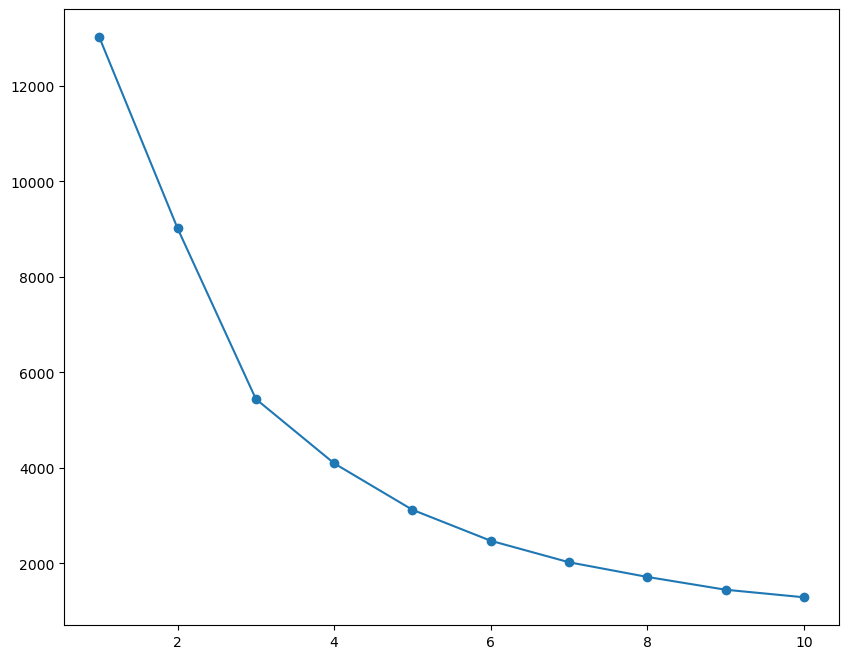

In [51]:
plt.figure(figsize=(10,8))
plt.plot(k_range,inertia_values,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Within-Clusters Sum of Squares(Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [52]:
# Apply K-Means clustring to create clusters based on RFM metrics
kmeams=KMeans(n_clusters=4,random_state=40)
rfm_data['KMeans_Cluster']=kmeans.fit_predict(rfm_scaled)

In [53]:
print("K-Means Clustering")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering
KMeans_Cluster
0    1603
7     952
4     596
5     562
1     496
9     102
6      16
2       6
3       4
8       2
Name: count, dtype: int64


TypeError: 'str' object is not callable

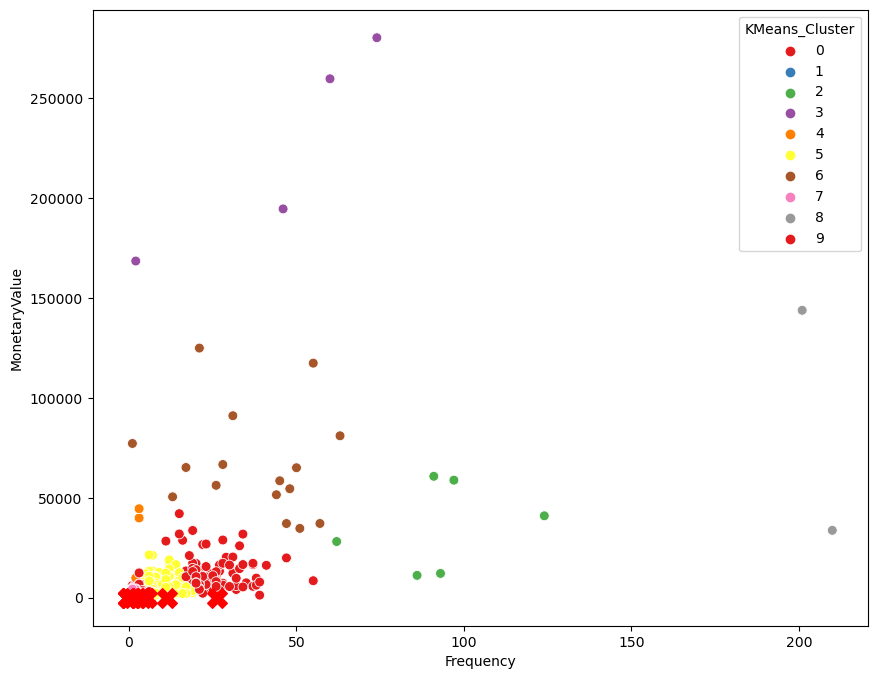

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rfm_data,x='Frequency',y='MonetaryValue',hue='KMeans_Cluster',palette='Set1',s=50)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='red',marker='X',s=200,label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (k=4)')
plt.legend()
plt.grid(True)
plt.show()

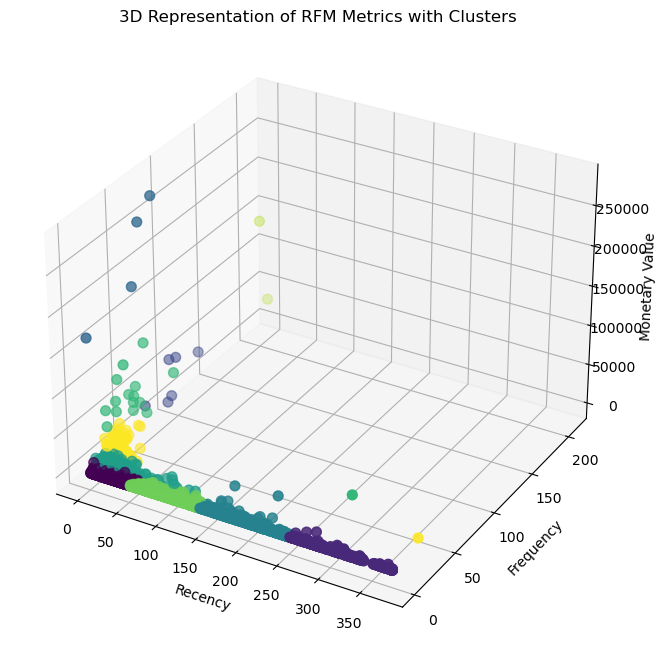

In [55]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(rfm_data['Recency'],rfm_data['Frequency'],rfm_data['MonetaryValue'],c=rfm_data['KMeans_Cluster'],cmap='viridis',s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [56]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering=AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster']=agg_clustering.fit_predict(rfm_scaled)

In [57]:
print("\nAgglomerative Hierarchical Clustering")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering
Agg_Cluster
1    3200
2     949
3     175
0      15
Name: count, dtype: int64


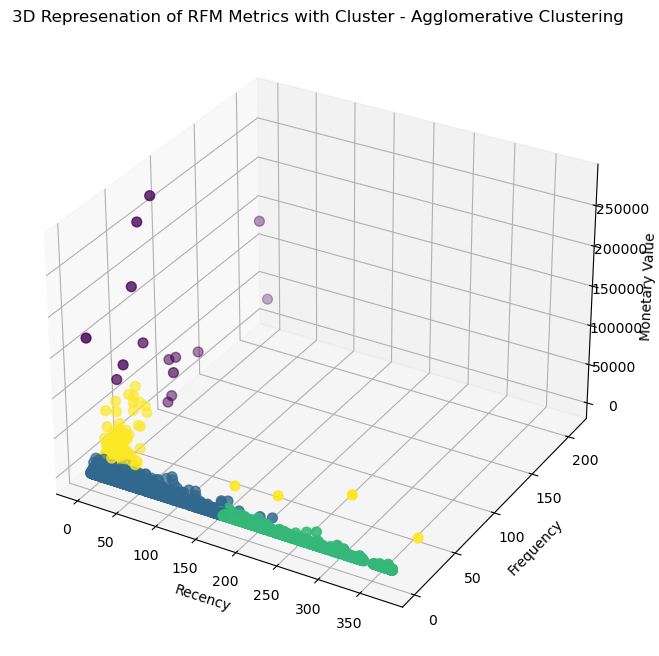

In [58]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(rfm_data['Recency'],rfm_data['Frequency'],rfm_data['MonetaryValue'],c=rfm_data['Agg_Cluster'],cmap='viridis',s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Represenation of RFM Metrics with Cluster - Agglomerative Clustering')
plt.show()

# Interpretation of Results and Communication

#### Conclusion:
In conclusion, our data-driven analysis has unveiled crucial insights that can empower our e-store to take decisive actions and enhance its business strategies:

Customer Segmentation: By clustering customers based on their RFM metrics, we have identified distinct segments with unique characteristics.

Targeted Marketing: Armed with this segmentation, we can now implement tailored marketing campaigns. We will focus on re-engaging potentially churned customers, rewarding and retaining high-value clients, and maximizing revenue from our devoted, active buyers.

Data-Driven Decision-Making: Our predictive models provide a foundation for accurate revenue forecasting and resource allocation.

Continuous Improvement: We encourage ongoing monitoring of customer behavior and regularly updating our strategies based on emerging trends.

### High-Recency, Low-Frequency, Low-Monetary

* These customers have high Recency but low Frequency and low MonetaryValue.

* They might be potential churned or inactive consumers who need re-engagement tactics.

### High-Recency, High-Frequency, High-Monetary

* These customers have high Recency, high Frequency, and high MonetaryValue.
* They are your best and most lucrative clients.Reward and retain them with personalized offers and loyalty programs.

### Low-Recency, High-Frequency, High-Monetary

* These customers have low Recency but high Frequency and high MonetaryValue.
* They are devoted, active buyers and a significant source of income.Respond well to loyalty incentives and tailored recommendations.

### Low-Recency, Low-Frequency, Low-Monetary

* These customers have low Recency, low Frequency, and low MonetaryValue.
* They might have made recent purchases but lack involvement or loyalty.
* Consider specific incentives or offers to increase their spending and frequency.